# Predictions of Geomagnetic Storms

Globally, research groups developed models to predict the arrival and impact of coronal mass ejections (CME) and their associated geomagnetic storms.

The CCMC scoreboard from NASA aims at collecting the output of these models for real-time predictions and acts as a research-based pre-event forecasting validation platform. There space weather groups from all around the world can submit their real-time model runs. 

In this Jupyter-Notebook we are investigating how accurate the predictions submitted to the CCMC scoreboard are in terms of arrival and intensity of the geomagnetic storm. 
* For the arrival time we will investigate the onset of the geomagnetic storm as visually derived from the Dst index.
* For the geoeffectivenss we compare the predicted Kp index range with the observed global Kp index and the local K index in Austria, calculated from data at the Conrad Observatory.

Further reading:

- CCMC CME Scoreboard: https://kauai.ccmc.gsfc.nasa.gov/CMEscoreboard/
- How to quantify predictions from CCMC Scoreboard: https://doi.org/10.1029/2018SW002046
- Kp index: https://isgi.unistra.fr/indices_kp.php
- Dst index: https://isgi.unistra.fr/indices_dst.php

 Note: We are using the python package geomagpy to read data and convert the resulting datastream into a pandas dataframe with which we will work in this example.

In [35]:
# import packages
from magpy.stream import read
from magpy.core import plot as mp

import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

# interactive plotting
matplotlib.use('TkAgg')
%matplotlib ipympl

In [36]:
# define a function to convert datastream to pandas dataframe
def magpy2pandas(stream):
    """
    DESCRIPTION
        Converts magpy data stream to pandas dataframe
    """
    import pandas as pd
    d = {}
    for key in stream.KEYLIST:
        col = stream._get_column(key)
        colname = stream.header.get('col-{}'.format(key), key)
        if len(col) > 0:
            d[colname] = col
    dataset = pd.DataFrame(d)
    return dataset

In [37]:
# load Kp data as datastream and convert to pandas dataframe
kp_data = read('/home/christopher/data/Kp/gfzkp2024*.cdf')
kp_df = magpy2pandas(kp_data)

# plot datastream with magpy 
#mp.tsplot(kp_data,keys=['var1'])

In [38]:
# load local K data as datastream and convert to pandas dataframe
k_data = read('/home/christopher/data/WIC_k/WIC_k_0001_0001_2024-*.cdf')
k_df = magpy2pandas(k_data)

In [39]:
# combine Kp and K dataframes
kp_df['K_WIC'] = k_df['K']

In [40]:
kp_df

,time,Kp,Sum Kp,Ap,Cp,K_WIC
0,2024-01-01 01:30:00,0.000000,13.0,9.0,0.5,0.0
1,2024-01-01 04:30:00,0.000000,13.0,9.0,0.5,0.0
2,2024-01-01 07:30:00,0.666667,13.0,9.0,0.5,1.0
3,2024-01-01 10:30:00,1.333333,13.0,9.0,0.5,2.0
4,2024-01-01 13:30:00,1.333333,13.0,9.0,0.5,2.0
...,...,...,...,...,...,...
2914,2024-12-30 07:30:00,2.333333,NaN,NaN,NaN,2.0
2915,2024-12-30 10:30:00,1.000000,NaN,NaN,NaN,1.0
2916,2024-12-30 13:30:00,1.666667,NaN,NaN,NaN,1.0
2917,2024-12-30 16:30:00,0.666667,NaN,NaN,NaN,1.0


In [41]:
len(kp_df)

2919

In [42]:
# load Dst data as datastream and convert to pandas dataframe
dst_data = read('/home/christopher/data/Dst/Dst_2024*.cdf')
dst_df = magpy2pandas(dst_data)
dst_df

,time,DST
0,2024-01-01 00:30:00,4.0
1,2024-01-01 01:30:00,5.0
2,2024-01-01 02:30:00,7.0
3,2024-01-01 03:30:00,8.0
4,2024-01-01 04:30:00,7.0
...,...,...
8779,2024-12-31 19:30:00,NaN
8780,2024-12-31 20:30:00,NaN
8781,2024-12-31 21:30:00,NaN
8782,2024-12-31 22:30:00,NaN


In [43]:
# load CME data (in json format) and convert to dataframe
file = '/home/christopher/data/cme_ccmc/cme_2024.json'
with open(file) as cme_file:
    dict_cme = json.load(cme_file)
cme = pd.DataFrame.from_dict(dict_cme, orient='index')
cme.reset_index(level=0, inplace=True)

In [44]:
# clean-up & prepare dataframe
cme['date'] = pd.to_datetime(cme['arrival'], format='%Y-%m-%dT%H:%M:%S')
cme.loc[123,'KPrange'] = '0 - 0'
cme[['low','high']] = cme['KPrange'].str.split(' - ',expand=True)
cme['low'] = pd.to_numeric(cme['low'])
cme['high'] = pd.to_numeric(cme['high'])
cme = cme.sort_values('index', ascending=True, ignore_index=True)

In [45]:
# show CME dataframe
cme

,index,start,arrival,KPrange,N,date,low,high
0,CME-20240105T015300,2024-01-05T01:53:00,2024-01-08T09:39:00,2.66667 - 5.0,4,2024-01-08 09:39:00,2.66667,5.00000
1,CME-20240106T081200,2024-01-06T08:12:00,2024-01-09T13:00:00,2.0 - 4.5,3,2024-01-09 13:00:00,2.00000,4.50000
2,CME-20240106T173600,2024-01-06T17:36:00,2024-01-10T01:00:00,2.0 - 4.0,2,2024-01-10 01:00:00,2.00000,4.00000
3,CME-20240109T154800,2024-01-09T15:48:00,2024-01-12T10:00:00,3.0 - 4.5,5,2024-01-12 10:00:00,3.00000,4.50000
4,CME-20240120T092400,2024-01-20T09:24:00,2024-01-22T16:50:00,4.44444 - 6.44444,15,2024-01-22 16:50:00,4.44444,6.44444
...,...,...,...,...,...,...,...,...
181,CME-20241226T191200,2024-12-26T19:12:00,2024-12-30T13:00:00,2.0 - 3.0,1,2024-12-30 13:00:00,2.00000,3.00000
182,CME-20241228T064800,2024-12-28T06:48:00,2025-01-01T10:00:00,2.0 - 4.0,1,2025-01-01 10:00:00,2.00000,4.00000
183,CME-20241229T012300,2024-12-29T01:23:00,2024-12-31T16:51:00,4.66667 - 6.33333,3,2024-12-31 16:51:00,4.66667,6.33333
184,CME-20241229T062400,2024-12-29T06:24:00,2024-12-31T16:11:00,5.11111 - 7.22222,10,2024-12-31 16:11:00,5.11111,7.22222


In [46]:
fl = '/home/christopher/Documents/Flags/flags_Dst_2025_08_21.json'
with open(fl) as flags_file:
    dict_flags = json.load(flags_file)
fls = pd.DataFrame.from_dict(dict_flags, orient='index')
fls.reset_index(level=0, inplace=True)
fls

,index,sensorid,starttime,endtime,components,flagtype,labelid,label,comment,groups,probabilities,stationid,validity,operator,color,modificationtime,flagversion
0,174985804285,LEMI025_22_0004,2024-01-01 13:00:00,2024-01-02 00:59:59,"[x, y, z]",4,021,geomagnetic storm,geomagnetic storm according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 14:58:16.234715,2.0
1,184233170861,LEMI025_22_0004,2024-01-03 13:25:31,2024-01-04 09:59:59,"[x, y, z]",4,021,geomagnetic storm,geomagnetic storm according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 15:00:16.850753,2.0
2,179724393461,LEMI025_22_0004,2024-02-10 15:55:33,2024-02-12 22:28:26,"[x, y, z]",4,021,geomagnetic storm,geomagnetic storm according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 15:12:03.528570,2.0
3,137390872744,LEMI025_22_0004,2024-02-24 15:00:07,2024-02-25 21:42:32,"[x, y, z]",4,021,geomagnetic storm,geomagnetic storm according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 15:19:25.131694,2.0
4,330581296572,LEMI025_22_0004,2024-03-03 09:00:00,2024-03-07 09:35:57,"[x, y, z]",4,021,geomagnetic storm,geomagnetic storm according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 15:27:22.121574,2.0
5,208362192413,LEMI025_22_0004,2024-03-18 13:00:00,2024-03-20 21:59:59,"[x, y, z]",4,021,geomagnetic storm,geomagnetic storm according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 15:30:53.155942,2.0
6,644310194174,LEMI025_22_0004,2024-03-21 01:00:00,2024-03-30 22:59:59,"[x, y, z]",4,021,geomagnetic storm,complex event according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 15:33:53.478709,2.0
7,163098315131,LEMI025_22_0004,2024-04-13 23:50:00,2024-04-18 22:59:59,"[x, y, z]",4,021,geomagnetic storm,geomagnetic storm according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 15:39:07.558999,2.0
8,460624380965,LEMI025_22_0004,2024-04-19 05:00:00,2024-04-20 22:59:59,"[x, y, z]",4,021,geomagnetic storm,geomagnetic storm according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 15:40:42.987287,2.0
9,150135041369,LEMI025_22_0004,2024-04-30 11:00:00,2024-05-04 11:59:59,"[x, y, z]",4,021,geomagnetic storm,complex event according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,d,Marina,,2025-08-21 15:44:44.622823,2.0


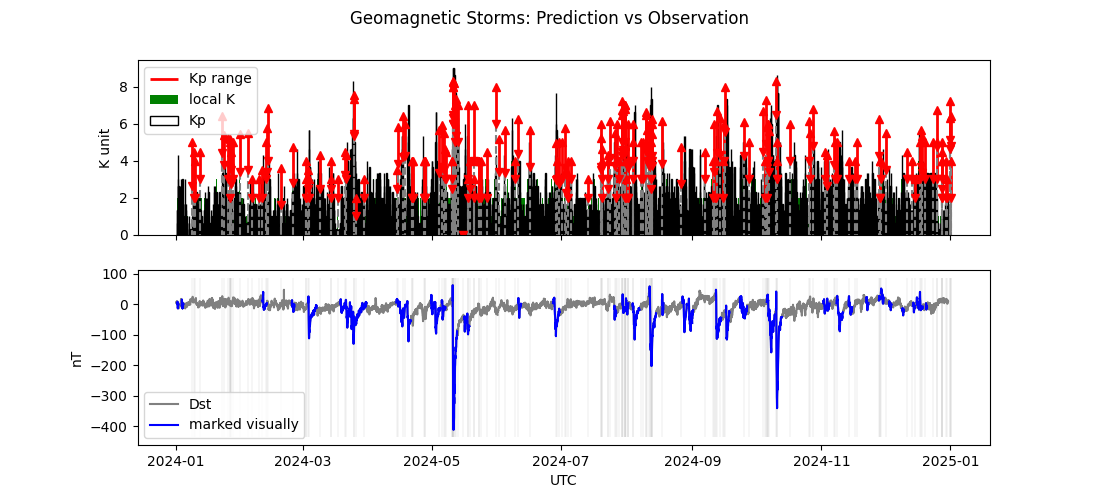

In [106]:
# Plot data beautifully
fig, axs = plt.subplots(2,sharex=True,figsize=(11,5))
fig.suptitle('Geomagnetic Storms: Prediction vs Observation')
axs[0].bar(kp_df['time'],kp_df['K_WIC'],color='green',width=0.124,label='local K',align='edge')
axs[0].bar(kp_df['time'],kp_df['Kp'],facecolor='none',edgecolor = 'black',width=0.124,label='Kp',align='edge')

axs[0].vlines(cme['date'], cme['low'], cme['high'],color='red',linewidth=2,label='Kp range')
axs[0].vlines(cme['date'], cme['low'], 0, linestyles='--',color='grey')
axs[0].plot(cme['date'],cme['high'],'^',color='red')
axs[0].plot(cme['date'],cme['low'],'v',color='red')
axs[0].set_ylabel('K unit')
axs[0].legend()

axs[1].plot(dst_df['time'],dst_df['DST'],label='Dst', color='grey')
ymin, ymax = axs[1].get_ylim()
axs[1].vlines(cme['date'],ymax, ymin, linestyles='-',color='grey',linewidth=0.1)

for index, row in fls.iterrows():
    start_time = row['starttime']
    end_time = row['endtime']
    mask_interval = (dst_df['time'] >= start_time) & (dst_df['time'] <= end_time)

    axs[1].plot(dst_df['time'][mask_interval], dst_df['DST'][mask_interval], color='blue', label='marked visually' if index == 0 else "")

axs[1].set_xlabel('UTC')
axs[1].set_ylabel('nT')
axs[1].legend()

# plot data quick
#fig1 = plt.figure(figsize=(11,5))
#plt.bar(kp_df['time'],kp_df['K_WIC'],color='green',width=0.124)
#plt.bar(kp_df['time'],kp_df['Kp'],facecolor='none',edgecolor = 'black',width=0.124)

#plt.vlines(cme['date'], cme['low'], cme['high'],color='grey',linewidth=2)
#plt.vlines(cme['date'], cme['low'], 0, linestyles='--',color='grey')
#plt.plot(cme['date'],cme['high'],'^',color='red')
#plt.plot(cme['date'],cme['low'],'v',color='red')

# Further Data Discovering

# Check the details of the dataframes for a certain timerange
start_time = '2024-01-09 10:30:00'
end_time = '2024-01-09 13:29:00'

# Show CME data
cme.loc[cme['date'].between(start_time,end_time)]

In [51]:
cme['Kp']=cme['KPrange']
cme

,index,start,arrival,KPrange,N,date,low,high,Kp
0,CME-20240105T015300,2024-01-05T01:53:00,2024-01-08T09:39:00,2.66667 - 5.0,4,2024-01-08 09:39:00,2.66667,5.00000,2.66667 - 5.0
1,CME-20240106T081200,2024-01-06T08:12:00,2024-01-09T13:00:00,2.0 - 4.5,3,2024-01-09 13:00:00,2.00000,4.50000,2.0 - 4.5
2,CME-20240106T173600,2024-01-06T17:36:00,2024-01-10T01:00:00,2.0 - 4.0,2,2024-01-10 01:00:00,2.00000,4.00000,2.0 - 4.0
3,CME-20240109T154800,2024-01-09T15:48:00,2024-01-12T10:00:00,3.0 - 4.5,5,2024-01-12 10:00:00,3.00000,4.50000,3.0 - 4.5
4,CME-20240120T092400,2024-01-20T09:24:00,2024-01-22T16:50:00,4.44444 - 6.44444,15,2024-01-22 16:50:00,4.44444,6.44444,4.44444 - 6.44444
...,...,...,...,...,...,...,...,...,...
181,CME-20241226T191200,2024-12-26T19:12:00,2024-12-30T13:00:00,2.0 - 3.0,1,2024-12-30 13:00:00,2.00000,3.00000,2.0 - 3.0
182,CME-20241228T064800,2024-12-28T06:48:00,2025-01-01T10:00:00,2.0 - 4.0,1,2025-01-01 10:00:00,2.00000,4.00000,2.0 - 4.0
183,CME-20241229T012300,2024-12-29T01:23:00,2024-12-31T16:51:00,4.66667 - 6.33333,3,2024-12-31 16:51:00,4.66667,6.33333,4.66667 - 6.33333
184,CME-20241229T062400,2024-12-29T06:24:00,2024-12-31T16:11:00,5.11111 - 7.22222,10,2024-12-31 16:11:00,5.11111,7.22222,5.11111 - 7.22222


In [105]:
import sys
from datetime import datetime

#once I know how to manage the other things, to change the Actual Kp value:
def right_Kp(KP, cme_date):
    val=-999. #dummy
    i=0
    while KP.iloc[i,0]<= cme_date:
        #print( KP.iloc[i,0], cme_date)#; sys.exit()
        val=KP.iloc[i,1]
        i+=1
        #print(i)
    return val


i=0
while i<=181:
    #print( cme.iloc[i,5], cme.iloc[i,5].dtype )
    #if cme.iloc[i,5] < datetime.strptime('2024-12-31 23:00:00', '%Y-%m-%d %H:%M:%S'):
    #cme_dat= cme.iloc[j,5]
    #a, b = right_Kp(kp_df, cme.iloc[j,5])
    #print('cme date: ',cme_dat,'actual Kp: ' ,a,'time: ',b)
    cme.iloc[i,8]= right_Kp(kp_df, cme.iloc[i,5]) #the kp value on the other kp table
    #cme.iloc[j,8]=a
    i+=1

cme

,index,start,arrival,KPrange,N,date,low,high,Kp,K,InRangeGlobal,InRangeLocal,Onsetdst
0,CME-20240105T015300,2024-01-05T01:53:00,2024-01-08T09:39:00,2.66667 - 5.0,4,2024-01-08 09:39:00,2.66667,5.00000,0.0,1.0,no,no,FA
1,CME-20240106T081200,2024-01-06T08:12:00,2024-01-09T13:00:00,2.0 - 4.5,3,2024-01-09 13:00:00,2.00000,4.50000,1.0,2.0,no,yes,FA
2,CME-20240106T173600,2024-01-06T17:36:00,2024-01-10T01:00:00,2.0 - 4.0,2,2024-01-10 01:00:00,2.00000,4.00000,1.0,2.0,no,yes,FA
3,CME-20240109T154800,2024-01-09T15:48:00,2024-01-12T10:00:00,3.0 - 4.5,5,2024-01-12 10:00:00,3.00000,4.50000,0.333333,0.0,no,no,FA
4,CME-20240120T092400,2024-01-20T09:24:00,2024-01-22T16:50:00,4.44444 - 6.44444,15,2024-01-22 16:50:00,4.44444,6.44444,2.0,2.0,no,no,FA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,CME-20241226T191200,2024-12-26T19:12:00,2024-12-30T13:00:00,2.0 - 3.0,1,2024-12-30 13:00:00,2.00000,3.00000,1.0,1.0,no,no,FA
182,CME-20241228T064800,2024-12-28T06:48:00,2025-01-01T10:00:00,2.0 - 4.0,1,2025-01-01 10:00:00,2.00000,4.00000,NaN,NaN,no,no,FA
183,CME-20241229T012300,2024-12-29T01:23:00,2024-12-31T16:51:00,4.66667 - 6.33333,3,2024-12-31 16:51:00,4.66667,6.33333,NaN,NaN,no,no,FA
184,CME-20241229T062400,2024-12-29T06:24:00,2024-12-31T16:11:00,5.11111 - 7.22222,10,2024-12-31 16:11:00,5.11111,7.22222,NaN,NaN,no,no,FA


In [53]:
# Show Kp & K data
kp_df.loc[kp_df['time'].between(start_time,end_time)] 

,time,Kp,Sum Kp,Ap,Cp,K_WIC
67,2024-01-09 10:30:00,1.0,10.0,5.0,0.2,2.0


In [54]:
#OWN IDEA
#merge cme and kp dataframes
#sort data by time and date
#create a loop for the dates
#assign 

In [55]:
#elif datetime between date and date' then Kp=the one of datetime

# Evaluation Prediction vs Kp & local K

In [56]:
# create empty evaluation file
#cme_hit = cme[['index','start','arrival','KPrange']].copy()
#cme_hit['inRangeGlobal'] = ''
#cme_hit['inRangeLocal'] = ''
#cme_hit['Kp'] = np.nan
#cme_hit['K'] = np.nan
#cme_hit['timingKp'] = ''#hit, miss, early, late, N/A
#cme_hit['timingK'] = ''#hit, miss, early, late, N/A
#cme_hit['onsetDst'] = ''#hit, miss, early, late, N/A
#cme_hit.to_csv('cme_hit_empty.csv')

In [57]:
# Load evaluation data
cme_hit = pd.read_csv('cme_hit.csv',index_col=0)

In [58]:
# Show evaluation for CME #1
cme_hit.loc[1]

index            CME-20240106T081200
start            2024-01-06T08:12:00
arrival          2024-01-09T13:00:00
KPrange                    2.0 - 4.5
inRangeGlobal                     no
inRangeLocal                      no
Kp                              0.66
K                                1.0
timingKp                           M
timingK                            M
onsetDst                          FA
Name: 1, dtype: object

In [59]:
# show CME evaluation
cme_hit

,index,start,arrival,KPrange,inRangeGlobal,inRangeLocal,Kp,K,timingKp,timingK,onsetDst
0,CME-20240105T015300,2024-01-05T01:53:00,2024-01-08T09:39:00,2.66667 - 5.0,no,no,0.33,1.0,FA,FA,FA
1,CME-20240106T081200,2024-01-06T08:12:00,2024-01-09T13:00:00,2.0 - 4.5,no,no,0.66,1.0,M,M,FA
2,CME-20240106T173600,2024-01-06T17:36:00,2024-01-10T01:00:00,2.0 - 4.0,no,no,1.66,1.0,H,M,FA
3,CME-20240109T154800,2024-01-09T15:48:00,2024-01-12T10:00:00,3.0 - 4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CME-20240120T092400,2024-01-20T09:24:00,2024-01-22T16:50:00,4.44444 - 6.44444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
181,CME-20241226T191200,2024-12-26T19:12:00,2024-12-30T13:00:00,2.0 - 3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,CME-20241228T064800,2024-12-28T06:48:00,2025-01-01T10:00:00,2.0 - 4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,CME-20241229T012300,2024-12-29T01:23:00,2024-12-31T16:51:00,4.66667 - 6.33333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,CME-20241229T062400,2024-12-29T06:24:00,2024-12-31T16:11:00,5.11111 - 7.22222,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
cme_hit.loc[123,'KPrange'] = '0 - 0'
cme_hit[['low','high']] = cme_hit['KPrange'].str.split(' - ',expand=True)
cme_hit['low'] = pd.to_numeric(cme_hit['low'])
cme_hit['high'] = pd.to_numeric(cme_hit['high'])
cme_hit = cme_hit.sort_values('index', ascending=True, ignore_index=True)

cme_hit

,index,start,arrival,KPrange,inRangeGlobal,inRangeLocal,Kp,K,timingKp,timingK,onsetDst,low,high
0,CME-20240105T015300,2024-01-05T01:53:00,2024-01-08T09:39:00,2.66667 - 5.0,no,no,0.33,1.0,FA,FA,FA,2.66667,5.00000
1,CME-20240106T081200,2024-01-06T08:12:00,2024-01-09T13:00:00,2.0 - 4.5,no,no,0.66,1.0,M,M,FA,2.00000,4.50000
2,CME-20240106T173600,2024-01-06T17:36:00,2024-01-10T01:00:00,2.0 - 4.0,no,no,1.66,1.0,H,M,FA,2.00000,4.00000
3,CME-20240109T154800,2024-01-09T15:48:00,2024-01-12T10:00:00,3.0 - 4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,4.50000
4,CME-20240120T092400,2024-01-20T09:24:00,2024-01-22T16:50:00,4.44444 - 6.44444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.44444,6.44444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,CME-20241226T191200,2024-12-26T19:12:00,2024-12-30T13:00:00,2.0 - 3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000,3.00000
182,CME-20241228T064800,2024-12-28T06:48:00,2025-01-01T10:00:00,2.0 - 4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000,4.00000
183,CME-20241229T012300,2024-12-29T01:23:00,2024-12-31T16:51:00,4.66667 - 6.33333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.66667,6.33333
184,CME-20241229T062400,2024-12-29T06:24:00,2024-12-31T16:11:00,5.11111 - 7.22222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.11111,7.22222


In [61]:
index = 2
row = cme_hit.iloc[index]
print(row)

index            CME-20240106T173600
start            2024-01-06T17:36:00
arrival          2024-01-10T01:00:00
KPrange                    2.0 - 4.0
inRangeGlobal                     no
inRangeLocal                      no
Kp                              1.66
K                                1.0
timingKp                           H
timingK                            M
onsetDst                          FA
low                              2.0
high                             4.0
Name: 2, dtype: object


In [62]:
if row['Kp'] <= row['high']:
    row['inRangeGlobal']='yes'




/tmp/ipykernel_4908/3932693526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row['inRangeGlobal']='yes'


In [63]:
i = 0
for index, row in cme_hit.iterrows():
    print(i,row['Kp'])
    i+=1
    #if row['Kp'] <= row['high'] and row['Kp'] >= row['low']:
     #   row['inRangeGlobal']='yes'
   # else:
    #    row['inRangeGlobal']='no'
    #print('row: ', index, 'value at column low:', row['low'])

0 0.33
1 0.66
2 1.66
3 nan
4 nan
5 nan
6 nan
7 nan
8 nan
9 nan
10 nan
11 nan
12 nan
13 nan
14 nan
15 nan
16 nan
17 nan
18 nan
19 nan
20 nan
21 nan
22 nan
23 nan
24 nan
25 nan
26 nan
27 nan
28 nan
29 nan
30 nan
31 nan
32 nan
33 nan
34 nan
35 nan
36 nan
37 nan
38 nan
39 nan
40 nan
41 nan
42 nan
43 nan
44 nan
45 nan
46 nan
47 nan
48 nan
49 nan
50 nan
51 nan
52 nan
53 nan
54 nan
55 nan
56 nan
57 nan
58 nan
59 nan
60 nan
61 nan
62 nan
63 nan
64 nan
65 nan
66 nan
67 nan
68 nan
69 nan
70 nan
71 nan
72 nan
73 nan
74 nan
75 nan
76 nan
77 nan
78 nan
79 nan
80 nan
81 nan
82 nan
83 nan
84 nan
85 nan
86 nan
87 nan
88 nan
89 nan
90 nan
91 nan
92 nan
93 nan
94 nan
95 nan
96 nan
97 nan
98 nan
99 nan
100 nan
101 nan
102 nan
103 nan
104 nan
105 nan
106 nan
107 nan
108 nan
109 nan
110 nan
111 nan
112 nan
113 nan
114 nan
115 nan
116 nan
117 nan
118 nan
119 nan
120 nan
121 nan
122 nan
123 nan
124 nan
125 nan
126 nan
127 nan
128 nan
129 nan
130 nan
131 nan
132 nan
133 nan
134 nan
135 nan
136 nan
137 nan
138

In [64]:
cme_hit

,index,start,arrival,KPrange,inRangeGlobal,inRangeLocal,Kp,K,timingKp,timingK,onsetDst,low,high
0,CME-20240105T015300,2024-01-05T01:53:00,2024-01-08T09:39:00,2.66667 - 5.0,no,no,0.33,1.0,FA,FA,FA,2.66667,5.00000
1,CME-20240106T081200,2024-01-06T08:12:00,2024-01-09T13:00:00,2.0 - 4.5,no,no,0.66,1.0,M,M,FA,2.00000,4.50000
2,CME-20240106T173600,2024-01-06T17:36:00,2024-01-10T01:00:00,2.0 - 4.0,no,no,1.66,1.0,H,M,FA,2.00000,4.00000
3,CME-20240109T154800,2024-01-09T15:48:00,2024-01-12T10:00:00,3.0 - 4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00000,4.50000
4,CME-20240120T092400,2024-01-20T09:24:00,2024-01-22T16:50:00,4.44444 - 6.44444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.44444,6.44444
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,CME-20241226T191200,2024-12-26T19:12:00,2024-12-30T13:00:00,2.0 - 3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000,3.00000
182,CME-20241228T064800,2024-12-28T06:48:00,2025-01-01T10:00:00,2.0 - 4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00000,4.00000
183,CME-20241229T012300,2024-12-29T01:23:00,2024-12-31T16:51:00,4.66667 - 6.33333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.66667,6.33333
184,CME-20241229T062400,2024-12-29T06:24:00,2024-12-31T16:11:00,5.11111 - 7.22222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.11111,7.22222


In [65]:
# fill new CME #nr_cme and then run this cell
nr_cme = 
cme_hit.loc[nr_cme,'inRangeGlobal']='yes / no / N/A'
cme_hit.loc[nr_cme,'inRangeLocal']='yes / no / N/A'
cme_hit.loc[nr_cme,'Kp']=0..9
cme_hit.loc[nr_cme,'K']=0..9
cme_hit.loc[nr_cme,'timingKp']='hit / miss / false alarm / correct rejection / N/A '
cme_hit.loc[nr_cme,'timingK']='hit / miss / false alarm / correct rejection / N/A '
cme_hit.loc[nr_cme,'onsetDst']='hit / miss / false alarm / correct rejection / N/A 


SyntaxError: unterminated string literal (detected at line 9) (721435320.py, line 9)

In [ ]:
# save updated CME evaluation when done
#cme_hit.to_csv('cme_hit_updated.csv')
# do not forget to rename it

In [ ]:
# try to code yourself - Advanced Level....
# e.g.: fill the columns 'Kp' and 'K' in cme_hit automatically

In [ ]:
# Create Contigency table as in https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2018SW002046
# For Timing as in Figure 2
# Hit / Miss / False Alarm / Correct Rejection
# using a hit intervall of 3h (same resolution as the official K and Kp index)
# add metrics for Hit in second step


# Kp and K columns

In [67]:
cme['Kp']=cme['KPrange']
cme

,index,start,arrival,KPrange,N,date,low,high,Kp
0,CME-20240105T015300,2024-01-05T01:53:00,2024-01-08T09:39:00,2.66667 - 5.0,4,2024-01-08 09:39:00,2.66667,5.00000,2.66667 - 5.0
1,CME-20240106T081200,2024-01-06T08:12:00,2024-01-09T13:00:00,2.0 - 4.5,3,2024-01-09 13:00:00,2.00000,4.50000,2.0 - 4.5
2,CME-20240106T173600,2024-01-06T17:36:00,2024-01-10T01:00:00,2.0 - 4.0,2,2024-01-10 01:00:00,2.00000,4.00000,2.0 - 4.0
3,CME-20240109T154800,2024-01-09T15:48:00,2024-01-12T10:00:00,3.0 - 4.5,5,2024-01-12 10:00:00,3.00000,4.50000,3.0 - 4.5
4,CME-20240120T092400,2024-01-20T09:24:00,2024-01-22T16:50:00,4.44444 - 6.44444,15,2024-01-22 16:50:00,4.44444,6.44444,4.44444 - 6.44444
...,...,...,...,...,...,...,...,...,...
181,CME-20241226T191200,2024-12-26T19:12:00,2024-12-30T13:00:00,2.0 - 3.0,1,2024-12-30 13:00:00,2.00000,3.00000,2.0 - 3.0
182,CME-20241228T064800,2024-12-28T06:48:00,2025-01-01T10:00:00,2.0 - 4.0,1,2025-01-01 10:00:00,2.00000,4.00000,2.0 - 4.0
183,CME-20241229T012300,2024-12-29T01:23:00,2024-12-31T16:51:00,4.66667 - 6.33333,3,2024-12-31 16:51:00,4.66667,6.33333,4.66667 - 6.33333
184,CME-20241229T062400,2024-12-29T06:24:00,2024-12-31T16:11:00,5.11111 - 7.22222,10,2024-12-31 16:11:00,5.11111,7.22222,5.11111 - 7.22222


In [70]:
import sys
from datetime import datetime

#once I know how to manage the other things, to change the Actual Kp value:
def right_Kp(KP, cme_date):
    val=-999. #dummy
    i=0
    while KP.iloc[i,0]<= cme_date:
        #print( KP.iloc[i,0], cme_date)#; sys.exit()
        val=KP.iloc[i,1]
        if i<2918:
            i+=1
        else:
            val= np.nan
            break
        #print(i)
    return val


i=0
while i<=185:
    #print( cme.iloc[i,5], cme.iloc[i,5].dtype )
    #if cme.iloc[i,5] < datetime.strptime('2024-12-31 23:00:00', '%Y-%m-%d %H:%M:%S'):
    #cme_dat= cme.iloc[j,5]
    #a, b = right_Kp(kp_df, cme.iloc[j,5])
    #print('cme date: ',cme_dat,'actual Kp: ' ,a,'time: ',b)
    if cme.iloc[i,5]<dt:
        cme.iloc[i,8]= right_Kp(kp_df, cme.iloc[i,5]) #the kp value on the other kp table
    #cme.iloc[j,8]=a
    else:
        cme.iloc[i,8]= np.nan
    i+=1

cme

,index,start,arrival,KPrange,N,date,low,high,Kp
0,CME-20240105T015300,2024-01-05T01:53:00,2024-01-08T09:39:00,2.66667 - 5.0,4,2024-01-08 09:39:00,2.66667,5.00000,0.0
1,CME-20240106T081200,2024-01-06T08:12:00,2024-01-09T13:00:00,2.0 - 4.5,3,2024-01-09 13:00:00,2.00000,4.50000,1.0
2,CME-20240106T173600,2024-01-06T17:36:00,2024-01-10T01:00:00,2.0 - 4.0,2,2024-01-10 01:00:00,2.00000,4.00000,1.0
3,CME-20240109T154800,2024-01-09T15:48:00,2024-01-12T10:00:00,3.0 - 4.5,5,2024-01-12 10:00:00,3.00000,4.50000,0.333333
4,CME-20240120T092400,2024-01-20T09:24:00,2024-01-22T16:50:00,4.44444 - 6.44444,15,2024-01-22 16:50:00,4.44444,6.44444,2.0
...,...,...,...,...,...,...,...,...,...
181,CME-20241226T191200,2024-12-26T19:12:00,2024-12-30T13:00:00,2.0 - 3.0,1,2024-12-30 13:00:00,2.00000,3.00000,1.0
182,CME-20241228T064800,2024-12-28T06:48:00,2025-01-01T10:00:00,2.0 - 4.0,1,2025-01-01 10:00:00,2.00000,4.00000,NaN
183,CME-20241229T012300,2024-12-29T01:23:00,2024-12-31T16:51:00,4.66667 - 6.33333,3,2024-12-31 16:51:00,4.66667,6.33333,NaN
184,CME-20241229T062400,2024-12-29T06:24:00,2024-12-31T16:11:00,5.11111 - 7.22222,10,2024-12-31 16:11:00,5.11111,7.22222,NaN


In [ ]:
cme

In [ ]:
kp_df

In [71]:
cme['K']=cme['Kp']
cme

,index,start,arrival,KPrange,N,date,low,high,Kp,K
0,CME-20240105T015300,2024-01-05T01:53:00,2024-01-08T09:39:00,2.66667 - 5.0,4,2024-01-08 09:39:00,2.66667,5.00000,0.0,0.0
1,CME-20240106T081200,2024-01-06T08:12:00,2024-01-09T13:00:00,2.0 - 4.5,3,2024-01-09 13:00:00,2.00000,4.50000,1.0,1.0
2,CME-20240106T173600,2024-01-06T17:36:00,2024-01-10T01:00:00,2.0 - 4.0,2,2024-01-10 01:00:00,2.00000,4.00000,1.0,1.0
3,CME-20240109T154800,2024-01-09T15:48:00,2024-01-12T10:00:00,3.0 - 4.5,5,2024-01-12 10:00:00,3.00000,4.50000,0.333333,0.333333
4,CME-20240120T092400,2024-01-20T09:24:00,2024-01-22T16:50:00,4.44444 - 6.44444,15,2024-01-22 16:50:00,4.44444,6.44444,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
181,CME-20241226T191200,2024-12-26T19:12:00,2024-12-30T13:00:00,2.0 - 3.0,1,2024-12-30 13:00:00,2.00000,3.00000,1.0,1.0
182,CME-20241228T064800,2024-12-28T06:48:00,2025-01-01T10:00:00,2.0 - 4.0,1,2025-01-01 10:00:00,2.00000,4.00000,NaN,NaN
183,CME-20241229T012300,2024-12-29T01:23:00,2024-12-31T16:51:00,4.66667 - 6.33333,3,2024-12-31 16:51:00,4.66667,6.33333,NaN,NaN
184,CME-20241229T062400,2024-12-29T06:24:00,2024-12-31T16:11:00,5.11111 - 7.22222,10,2024-12-31 16:11:00,5.11111,7.22222,NaN,NaN


In [72]:
import sys
from datetime import datetime

#once I know how to manage the other things, to change the Actual Kp value:
def right_K(K, cme_date):
    val=-999. #dummy
    i=0
    while K.iloc[i,0]<= cme_date:
        #print( KP.iloc[i,0], cme_date)#; sys.exit()
        val=K.iloc[i,5]
        if i<2918:
            i+=1
        else:
            val= np.nan
            break
    return val
        
        #print(i)
   # return val


i=0
while i<=185:
    #print( cme.iloc[i,5], cme.iloc[i,5].dtype )
    #if cme.iloc[i,5] < datetime.strptime('2024-12-31 23:00:00', '%Y-%m-%d %H:%M:%S'):
    #cme_dat= cme.iloc[j,5]
    #a, b = right_Kp(kp_df, cme.iloc[j,5])
   #print('cme date: ',cme_dat,'actual Kp: ' ,a,'time: ',b)
    if cme.iloc[i,5] < dt:
        cme.iloc[i,9]= right_K(kp_df, cme.iloc[i,5]) #the kp value on the other kp table
    #cme.iloc[j,8]=a
    else:
        cme.iloc[i,9]= np.nan
        
    print (cme.iloc[i,5], cme.iloc[i,9], i)
    i+=1
    
    
  #  for i==182 and i==185
   # cme.iloc[i,9]= NaN
  #  pass

2024-01-08 09:39:00 1.0 0
2024-01-09 13:00:00 2.0 1
2024-01-10 01:00:00 2.0 2
2024-01-12 10:00:00 0.0 3
2024-01-22 16:50:00 2.0 4
2024-01-23 11:41:00 1.0 5
2024-01-25 09:33:00 1.0 6
2024-01-26 16:52:00 2.0 7
2024-01-26 09:19:00 0.0 8
2024-01-26 11:24:00 1.0 9
2024-01-26 12:26:00 1.0 10
2024-01-26 20:30:00 1.0 11
2024-01-28 02:00:00 1.0 12
2024-01-31 03:34:00 0.0 13
2024-02-04 00:44:00 1.0 14
2024-02-05 20:00:00 2.0 15
2024-02-09 02:21:00 0.0 16
2024-02-10 12:00:00 2.0 17
2024-02-12 16:31:00 0.0 18
2024-02-12 18:25:00 0.0 19
2024-02-13 12:23:00 2.0 20
2024-02-19 17:24:00 0.0 21
2024-02-24 23:50:00 3.0 22
2024-03-02 08:00:00 0.0 23
2024-03-02 13:55:00 2.0 24
2024-03-03 09:14:00 1.0 25
2024-03-04 00:00:00 3.0 26
2024-03-09 03:56:00 4.0 27
2024-03-14 02:20:00 0.0 28
2024-03-14 10:00:00 2.0 29
2024-03-17 15:00:00 nan 30
2024-03-21 01:33:00 2.0 31
2024-03-21 00:17:00 2.0 32
2024-03-25 18:50:00 3.0 33
2024-03-24 20:11:00 5.0 34
2024-03-24 20:00:00 5.0 35
2024-03-29 14:00:00 2.0 36
2024-04-14 

In [69]:
from datetime import datetime
a = "2025-01-01 00:00:00"
dt = datetime.strptime(a, "%Y-%m-%d %H:%M:%S")
date = dt.timestamp()

print(date)

1735686000.0


In [ ]:
cme

# In range local and global columns

In [73]:
cme['InRangeGlobal']=cme['KPrange']
cme

,index,start,arrival,KPrange,N,date,low,high,Kp,K,InRangeGlobal
0,CME-20240105T015300,2024-01-05T01:53:00,2024-01-08T09:39:00,2.66667 - 5.0,4,2024-01-08 09:39:00,2.66667,5.00000,0.0,1.0,2.66667 - 5.0
1,CME-20240106T081200,2024-01-06T08:12:00,2024-01-09T13:00:00,2.0 - 4.5,3,2024-01-09 13:00:00,2.00000,4.50000,1.0,2.0,2.0 - 4.5
2,CME-20240106T173600,2024-01-06T17:36:00,2024-01-10T01:00:00,2.0 - 4.0,2,2024-01-10 01:00:00,2.00000,4.00000,1.0,2.0,2.0 - 4.0
3,CME-20240109T154800,2024-01-09T15:48:00,2024-01-12T10:00:00,3.0 - 4.5,5,2024-01-12 10:00:00,3.00000,4.50000,0.333333,0.0,3.0 - 4.5
4,CME-20240120T092400,2024-01-20T09:24:00,2024-01-22T16:50:00,4.44444 - 6.44444,15,2024-01-22 16:50:00,4.44444,6.44444,2.0,2.0,4.44444 - 6.44444
...,...,...,...,...,...,...,...,...,...,...,...
181,CME-20241226T191200,2024-12-26T19:12:00,2024-12-30T13:00:00,2.0 - 3.0,1,2024-12-30 13:00:00,2.00000,3.00000,1.0,1.0,2.0 - 3.0
182,CME-20241228T064800,2024-12-28T06:48:00,2025-01-01T10:00:00,2.0 - 4.0,1,2025-01-01 10:00:00,2.00000,4.00000,NaN,NaN,2.0 - 4.0
183,CME-20241229T012300,2024-12-29T01:23:00,2024-12-31T16:51:00,4.66667 - 6.33333,3,2024-12-31 16:51:00,4.66667,6.33333,NaN,NaN,4.66667 - 6.33333
184,CME-20241229T062400,2024-12-29T06:24:00,2024-12-31T16:11:00,5.11111 - 7.22222,10,2024-12-31 16:11:00,5.11111,7.22222,NaN,NaN,5.11111 - 7.22222


In [108]:
i=0
while i<=185:
    if cme.iloc[i,8] >= cme.iloc[i,6] and cme.iloc[i,8] <= cme.iloc[i,7]:
        cme.iloc[i,10]='yes'
    elif cme.iloc[i,8] < cme.iloc[i,6]:
        cme.iloc[i,10]= 'lower'
    elif cme.iloc[i,8] > cme.iloc[i,7]:
        cme.iloc[i,10]= 'higher'
    else:
        cme.iloc[i,10] = np.nan
    i+=1

cme

,index,start,arrival,KPrange,N,date,low,high,Kp,K,InRangeGlobal,InRangeLocal,Onsetdst
0,CME-20240105T015300,2024-01-05T01:53:00,2024-01-08T09:39:00,2.66667 - 5.0,4,2024-01-08 09:39:00,2.66667,5.00000,0.0,1.0,lower,no,FA
1,CME-20240106T081200,2024-01-06T08:12:00,2024-01-09T13:00:00,2.0 - 4.5,3,2024-01-09 13:00:00,2.00000,4.50000,1.0,2.0,lower,yes,FA
2,CME-20240106T173600,2024-01-06T17:36:00,2024-01-10T01:00:00,2.0 - 4.0,2,2024-01-10 01:00:00,2.00000,4.00000,1.0,2.0,lower,yes,FA
3,CME-20240109T154800,2024-01-09T15:48:00,2024-01-12T10:00:00,3.0 - 4.5,5,2024-01-12 10:00:00,3.00000,4.50000,0.333333,0.0,lower,no,FA
4,CME-20240120T092400,2024-01-20T09:24:00,2024-01-22T16:50:00,4.44444 - 6.44444,15,2024-01-22 16:50:00,4.44444,6.44444,2.0,2.0,lower,no,FA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,CME-20241226T191200,2024-12-26T19:12:00,2024-12-30T13:00:00,2.0 - 3.0,1,2024-12-30 13:00:00,2.00000,3.00000,1.0,1.0,lower,no,FA
182,CME-20241228T064800,2024-12-28T06:48:00,2025-01-01T10:00:00,2.0 - 4.0,1,2025-01-01 10:00:00,2.00000,4.00000,NaN,NaN,NaN,no,FA
183,CME-20241229T012300,2024-12-29T01:23:00,2024-12-31T16:51:00,4.66667 - 6.33333,3,2024-12-31 16:51:00,4.66667,6.33333,NaN,NaN,NaN,no,FA
184,CME-20241229T062400,2024-12-29T06:24:00,2024-12-31T16:11:00,5.11111 - 7.22222,10,2024-12-31 16:11:00,5.11111,7.22222,NaN,NaN,NaN,no,FA


In [109]:
cme.loc[cme.InRangeGlobal.isin(['higher']),:]

,index,start,arrival,KPrange,N,date,low,high,Kp,K,InRangeGlobal,InRangeLocal,Onsetdst
26,CME-20240228T231200,2024-02-28T23:12:00,2024-03-04T00:00:00,2.0 - 3.0,2,2024-03-04 00:00:00,2.00000,3.00000,3.666667,3.0,higher,no,H
33,CME-20240321T184800,2024-03-21T18:48:00,2024-03-25T18:50:00,1.0 - 2.0,4,2024-03-25 18:50:00,1.00000,2.00000,3.0,3.0,higher,no,H
52,CME-20240507T031200,2024-05-07T03:12:00,2024-05-10T14:00:00,2.5 - 4.0,3,2024-05-10 14:00:00,2.50000,4.00000,4.666667,3.0,higher,no,H
53,CME-20240507T052400,2024-05-07T05:24:00,2024-05-10T14:00:00,3.0 - 4.0,3,2024-05-10 14:00:00,3.00000,4.00000,4.666667,3.0,higher,no,H
55,CME-20240508T122400,2024-05-08T12:24:00,2024-05-11T00:52:00,6.0 - 8.0,11,2024-05-11 00:52:00,6.00000,8.00000,9.0,7.0,higher,no,H
56,CME-20240508T191200,2024-05-08T19:12:00,2024-05-10T21:57:00,6.5 - 8.0,3,2024-05-10 21:57:00,6.50000,8.00000,8.333333,7.0,higher,no,H
57,CME-20240508T222400,2024-05-08T22:24:00,2024-05-10T22:43:00,6.0 - 8.25,10,2024-05-10 22:43:00,6.00000,8.25000,9.0,7.0,higher,no,H
58,CME-20240509T092400,2024-05-09T09:24:00,2024-05-11T03:05:00,6.0 - 8.2,10,2024-05-11 03:05:00,6.00000,8.20000,9.0,7.0,higher,no,H
59,CME-20240509T182300,2024-05-09T18:23:00,2024-05-11T23:19:00,5.0 - 7.0,7,2024-05-11 23:19:00,5.00000,7.00000,7.666667,6.0,higher,no,H
62,CME-20240513T091200,2024-05-13T09:12:00,2024-05-15T11:30:00,0 - 0,2,2024-05-15 11:30:00,0.00000,0.00000,2.666667,2.0,higher,no,FA


In [75]:
cme['InRangeLocal']=cme['InRangeGlobal']
cme

,index,start,arrival,KPrange,N,date,low,high,Kp,K,InRangeGlobal,InRangeLocal
0,CME-20240105T015300,2024-01-05T01:53:00,2024-01-08T09:39:00,2.66667 - 5.0,4,2024-01-08 09:39:00,2.66667,5.00000,0.0,1.0,no,no
1,CME-20240106T081200,2024-01-06T08:12:00,2024-01-09T13:00:00,2.0 - 4.5,3,2024-01-09 13:00:00,2.00000,4.50000,1.0,2.0,no,no
2,CME-20240106T173600,2024-01-06T17:36:00,2024-01-10T01:00:00,2.0 - 4.0,2,2024-01-10 01:00:00,2.00000,4.00000,1.0,2.0,no,no
3,CME-20240109T154800,2024-01-09T15:48:00,2024-01-12T10:00:00,3.0 - 4.5,5,2024-01-12 10:00:00,3.00000,4.50000,0.333333,0.0,no,no
4,CME-20240120T092400,2024-01-20T09:24:00,2024-01-22T16:50:00,4.44444 - 6.44444,15,2024-01-22 16:50:00,4.44444,6.44444,2.0,2.0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...
181,CME-20241226T191200,2024-12-26T19:12:00,2024-12-30T13:00:00,2.0 - 3.0,1,2024-12-30 13:00:00,2.00000,3.00000,1.0,1.0,no,no
182,CME-20241228T064800,2024-12-28T06:48:00,2025-01-01T10:00:00,2.0 - 4.0,1,2025-01-01 10:00:00,2.00000,4.00000,NaN,NaN,no,no
183,CME-20241229T012300,2024-12-29T01:23:00,2024-12-31T16:51:00,4.66667 - 6.33333,3,2024-12-31 16:51:00,4.66667,6.33333,NaN,NaN,no,no
184,CME-20241229T062400,2024-12-29T06:24:00,2024-12-31T16:11:00,5.11111 - 7.22222,10,2024-12-31 16:11:00,5.11111,7.22222,NaN,NaN,no,no


In [110]:
i=0
while i<=185:
    if cme.iloc[i,9] >= cme.iloc[i,6] and cme.iloc[i,8] <= cme.iloc[i,7]:
        cme.iloc[i,11]='yes'
    elif cme.iloc[i,9] < cme.iloc[i,6]:
        cme.iloc[i,11]= 'lower'
    elif cme.iloc[i,9] > cme.iloc[i,6]:
        cme.iloc[i,11]= 'higher'
    else:
        cme.iloc[i,11] = np.nan
    i+=1

cme

,index,start,arrival,KPrange,N,date,low,high,Kp,K,InRangeGlobal,InRangeLocal,Onsetdst
0,CME-20240105T015300,2024-01-05T01:53:00,2024-01-08T09:39:00,2.66667 - 5.0,4,2024-01-08 09:39:00,2.66667,5.00000,0.0,1.0,lower,lower,FA
1,CME-20240106T081200,2024-01-06T08:12:00,2024-01-09T13:00:00,2.0 - 4.5,3,2024-01-09 13:00:00,2.00000,4.50000,1.0,2.0,lower,yes,FA
2,CME-20240106T173600,2024-01-06T17:36:00,2024-01-10T01:00:00,2.0 - 4.0,2,2024-01-10 01:00:00,2.00000,4.00000,1.0,2.0,lower,yes,FA
3,CME-20240109T154800,2024-01-09T15:48:00,2024-01-12T10:00:00,3.0 - 4.5,5,2024-01-12 10:00:00,3.00000,4.50000,0.333333,0.0,lower,lower,FA
4,CME-20240120T092400,2024-01-20T09:24:00,2024-01-22T16:50:00,4.44444 - 6.44444,15,2024-01-22 16:50:00,4.44444,6.44444,2.0,2.0,lower,lower,FA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,CME-20241226T191200,2024-12-26T19:12:00,2024-12-30T13:00:00,2.0 - 3.0,1,2024-12-30 13:00:00,2.00000,3.00000,1.0,1.0,lower,lower,FA
182,CME-20241228T064800,2024-12-28T06:48:00,2025-01-01T10:00:00,2.0 - 4.0,1,2025-01-01 10:00:00,2.00000,4.00000,NaN,NaN,NaN,NaN,FA
183,CME-20241229T012300,2024-12-29T01:23:00,2024-12-31T16:51:00,4.66667 - 6.33333,3,2024-12-31 16:51:00,4.66667,6.33333,NaN,NaN,NaN,NaN,FA
184,CME-20241229T062400,2024-12-29T06:24:00,2024-12-31T16:11:00,5.11111 - 7.22222,10,2024-12-31 16:11:00,5.11111,7.22222,NaN,NaN,NaN,NaN,FA


# Onset dst

In [77]:
fls

,index,sensorid,starttime,endtime,components,flagtype,labelid,label,comment,groups,probabilities,stationid,validity,operator,color,modificationtime,flagversion
0,174985804285,LEMI025_22_0004,2024-01-01 13:00:00,2024-01-02 00:59:59,"[x, y, z]",4,021,geomagnetic storm,geomagnetic storm according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 14:58:16.234715,2.0
1,184233170861,LEMI025_22_0004,2024-01-03 13:25:31,2024-01-04 09:59:59,"[x, y, z]",4,021,geomagnetic storm,geomagnetic storm according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 15:00:16.850753,2.0
2,179724393461,LEMI025_22_0004,2024-02-10 15:55:33,2024-02-12 22:28:26,"[x, y, z]",4,021,geomagnetic storm,geomagnetic storm according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 15:12:03.528570,2.0
3,137390872744,LEMI025_22_0004,2024-02-24 15:00:07,2024-02-25 21:42:32,"[x, y, z]",4,021,geomagnetic storm,geomagnetic storm according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 15:19:25.131694,2.0
4,330581296572,LEMI025_22_0004,2024-03-03 09:00:00,2024-03-07 09:35:57,"[x, y, z]",4,021,geomagnetic storm,geomagnetic storm according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 15:27:22.121574,2.0
5,208362192413,LEMI025_22_0004,2024-03-18 13:00:00,2024-03-20 21:59:59,"[x, y, z]",4,021,geomagnetic storm,geomagnetic storm according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 15:30:53.155942,2.0
6,644310194174,LEMI025_22_0004,2024-03-21 01:00:00,2024-03-30 22:59:59,"[x, y, z]",4,021,geomagnetic storm,complex event according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 15:33:53.478709,2.0
7,163098315131,LEMI025_22_0004,2024-04-13 23:50:00,2024-04-18 22:59:59,"[x, y, z]",4,021,geomagnetic storm,geomagnetic storm according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 15:39:07.558999,2.0
8,460624380965,LEMI025_22_0004,2024-04-19 05:00:00,2024-04-20 22:59:59,"[x, y, z]",4,021,geomagnetic storm,geomagnetic storm according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,,Marina,,2025-08-21 15:40:42.987287,2.0
9,150135041369,LEMI025_22_0004,2024-04-30 11:00:00,2024-05-04 11:59:59,"[x, y, z]",4,021,geomagnetic storm,complex event according to dst,"{'magnetism': ['x', 'y', 'z', 'f']}",None,WIC,d,Marina,,2025-08-21 15:44:44.622823,2.0


In [78]:
flstime = pd.DataFrame()
flstime = fls.filter(['starttime','endtime'], axis=1)
flstime

,starttime,endtime
0,2024-01-01 13:00:00,2024-01-02 00:59:59
1,2024-01-03 13:25:31,2024-01-04 09:59:59
2,2024-02-10 15:55:33,2024-02-12 22:28:26
3,2024-02-24 15:00:07,2024-02-25 21:42:32
4,2024-03-03 09:00:00,2024-03-07 09:35:57
5,2024-03-18 13:00:00,2024-03-20 21:59:59
6,2024-03-21 01:00:00,2024-03-30 22:59:59
7,2024-04-13 23:50:00,2024-04-18 22:59:59
8,2024-04-19 05:00:00,2024-04-20 22:59:59
9,2024-04-30 11:00:00,2024-05-04 11:59:59


In [79]:
flstime['starttime']=pd.to_datetime(flstime['starttime'])
flstime['endtime']=pd.to_datetime(flstime['endtime'])

In [80]:
flstime['Minus_an_hour']=flstime['starttime'] - pd.Timedelta(hours=1)
flstime

,starttime,endtime,Minus_an_hour
0,2024-01-01 13:00:00,2024-01-02 00:59:59,2024-01-01 12:00:00
1,2024-01-03 13:25:31,2024-01-04 09:59:59,2024-01-03 12:25:31
2,2024-02-10 15:55:33,2024-02-12 22:28:26,2024-02-10 14:55:33
3,2024-02-24 15:00:07,2024-02-25 21:42:32,2024-02-24 14:00:07
4,2024-03-03 09:00:00,2024-03-07 09:35:57,2024-03-03 08:00:00
5,2024-03-18 13:00:00,2024-03-20 21:59:59,2024-03-18 12:00:00
6,2024-03-21 01:00:00,2024-03-30 22:59:59,2024-03-21 00:00:00
7,2024-04-13 23:50:00,2024-04-18 22:59:59,2024-04-13 22:50:00
8,2024-04-19 05:00:00,2024-04-20 22:59:59,2024-04-19 04:00:00
9,2024-04-30 11:00:00,2024-05-04 11:59:59,2024-04-30 10:00:00


In [81]:
flstimetwo = fls.filter(['starttime','endtime'], axis=1)
flstimetwo

,starttime,endtime
0,2024-01-01 13:00:00,2024-01-02 00:59:59
1,2024-01-03 13:25:31,2024-01-04 09:59:59
2,2024-02-10 15:55:33,2024-02-12 22:28:26
3,2024-02-24 15:00:07,2024-02-25 21:42:32
4,2024-03-03 09:00:00,2024-03-07 09:35:57
5,2024-03-18 13:00:00,2024-03-20 21:59:59
6,2024-03-21 01:00:00,2024-03-30 22:59:59
7,2024-04-13 23:50:00,2024-04-18 22:59:59
8,2024-04-19 05:00:00,2024-04-20 22:59:59
9,2024-04-30 11:00:00,2024-05-04 11:59:59


In [82]:
flstimetwo['endtime']=pd.to_datetime(flstimetwo['endtime'])

In [83]:
flstimetwo['starttime']=pd.to_datetime(flstimetwo['starttime'])

In [84]:
flstimetwo['Plus_twelve_hours']=flstimetwo['endtime']+ pd.Timedelta(hours=12)
flstimetwo['Minus_twelve_hours']=flstimetwo['starttime'] - pd.Timedelta(hours=12)
flstimetwo

,starttime,endtime,Plus_twelve_hours,Minus_twelve_hours
0,2024-01-01 13:00:00,2024-01-02 00:59:59,2024-01-02 12:59:59,2024-01-01 01:00:00
1,2024-01-03 13:25:31,2024-01-04 09:59:59,2024-01-04 21:59:59,2024-01-03 01:25:31
2,2024-02-10 15:55:33,2024-02-12 22:28:26,2024-02-13 10:28:26,2024-02-10 03:55:33
3,2024-02-24 15:00:07,2024-02-25 21:42:32,2024-02-26 09:42:32,2024-02-24 03:00:07
4,2024-03-03 09:00:00,2024-03-07 09:35:57,2024-03-07 21:35:57,2024-03-02 21:00:00
5,2024-03-18 13:00:00,2024-03-20 21:59:59,2024-03-21 09:59:59,2024-03-18 01:00:00
6,2024-03-21 01:00:00,2024-03-30 22:59:59,2024-03-31 10:59:59,2024-03-20 13:00:00
7,2024-04-13 23:50:00,2024-04-18 22:59:59,2024-04-19 10:59:59,2024-04-13 11:50:00
8,2024-04-19 05:00:00,2024-04-20 22:59:59,2024-04-21 10:59:59,2024-04-18 17:00:00
9,2024-04-30 11:00:00,2024-05-04 11:59:59,2024-05-04 23:59:59,2024-04-29 23:00:00


In [ ]:
#timedf = pd.DataFrame {'Date':[numpy.zeros[1,185]], 'Hours to sum':

In [85]:
cme['Onsetdst']=cme['Kp']
cme

,index,start,arrival,KPrange,N,date,low,high,Kp,K,InRangeGlobal,InRangeLocal,Onsetdst
0,CME-20240105T015300,2024-01-05T01:53:00,2024-01-08T09:39:00,2.66667 - 5.0,4,2024-01-08 09:39:00,2.66667,5.00000,0.0,1.0,no,no,0.0
1,CME-20240106T081200,2024-01-06T08:12:00,2024-01-09T13:00:00,2.0 - 4.5,3,2024-01-09 13:00:00,2.00000,4.50000,1.0,2.0,no,yes,1.0
2,CME-20240106T173600,2024-01-06T17:36:00,2024-01-10T01:00:00,2.0 - 4.0,2,2024-01-10 01:00:00,2.00000,4.00000,1.0,2.0,no,yes,1.0
3,CME-20240109T154800,2024-01-09T15:48:00,2024-01-12T10:00:00,3.0 - 4.5,5,2024-01-12 10:00:00,3.00000,4.50000,0.333333,0.0,no,no,0.333333
4,CME-20240120T092400,2024-01-20T09:24:00,2024-01-22T16:50:00,4.44444 - 6.44444,15,2024-01-22 16:50:00,4.44444,6.44444,2.0,2.0,no,no,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,CME-20241226T191200,2024-12-26T19:12:00,2024-12-30T13:00:00,2.0 - 3.0,1,2024-12-30 13:00:00,2.00000,3.00000,1.0,1.0,no,no,1.0
182,CME-20241228T064800,2024-12-28T06:48:00,2025-01-01T10:00:00,2.0 - 4.0,1,2025-01-01 10:00:00,2.00000,4.00000,NaN,NaN,no,no,NaN
183,CME-20241229T012300,2024-12-29T01:23:00,2024-12-31T16:51:00,4.66667 - 6.33333,3,2024-12-31 16:51:00,4.66667,6.33333,NaN,NaN,no,no,NaN
184,CME-20241229T062400,2024-12-29T06:24:00,2024-12-31T16:11:00,5.11111 - 7.22222,10,2024-12-31 16:11:00,5.11111,7.22222,NaN,NaN,no,no,NaN


In [86]:
i=0

while i<=185:
    j=0
    while j<= 45:
        #print('while j, i:',i)
        if flstime.iloc[j,2]<=cme.iloc[i,5]<=flstime.iloc[j,1]:
            cme.at[i,'Onsetdst'] = 'hit'
            break
            #print ('if')
        elif flstimetwo.iloc[j,3]<=cme.iloc[i,5]<=flstime.iloc[j,2] or flstimetwo.iloc[j,1]<=cme.iloc[i,5]<= flstimetwo.iloc[j,2]:
            cme.at[i,'Onsetdst'] = 'miss'
            break
            #print ('elif') 
        else:
            cme.at[i,'Onsetdst'] = 'FA'
            #print('else i: ',i)
            #print ('else')
           
      #  print('i: ', i, ' j: ', j)
        j+=1
        
        
    #print(i,j)   
    #print('while i,i: ', i)
  #  print('i: ', i, ' j: ', j)
    i+=1
cme

,index,start,arrival,KPrange,N,date,low,high,Kp,K,InRangeGlobal,InRangeLocal,Onsetdst
0,CME-20240105T015300,2024-01-05T01:53:00,2024-01-08T09:39:00,2.66667 - 5.0,4,2024-01-08 09:39:00,2.66667,5.00000,0.0,1.0,no,no,FA
1,CME-20240106T081200,2024-01-06T08:12:00,2024-01-09T13:00:00,2.0 - 4.5,3,2024-01-09 13:00:00,2.00000,4.50000,1.0,2.0,no,yes,FA
2,CME-20240106T173600,2024-01-06T17:36:00,2024-01-10T01:00:00,2.0 - 4.0,2,2024-01-10 01:00:00,2.00000,4.00000,1.0,2.0,no,yes,FA
3,CME-20240109T154800,2024-01-09T15:48:00,2024-01-12T10:00:00,3.0 - 4.5,5,2024-01-12 10:00:00,3.00000,4.50000,0.333333,0.0,no,no,FA
4,CME-20240120T092400,2024-01-20T09:24:00,2024-01-22T16:50:00,4.44444 - 6.44444,15,2024-01-22 16:50:00,4.44444,6.44444,2.0,2.0,no,no,FA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,CME-20241226T191200,2024-12-26T19:12:00,2024-12-30T13:00:00,2.0 - 3.0,1,2024-12-30 13:00:00,2.00000,3.00000,1.0,1.0,no,no,FA
182,CME-20241228T064800,2024-12-28T06:48:00,2025-01-01T10:00:00,2.0 - 4.0,1,2025-01-01 10:00:00,2.00000,4.00000,NaN,NaN,no,no,FA
183,CME-20241229T012300,2024-12-29T01:23:00,2024-12-31T16:51:00,4.66667 - 6.33333,3,2024-12-31 16:51:00,4.66667,6.33333,NaN,NaN,no,no,FA
184,CME-20241229T062400,2024-12-29T06:24:00,2024-12-31T16:11:00,5.11111 - 7.22222,10,2024-12-31 16:11:00,5.11111,7.22222,NaN,NaN,no,no,FA


In [ ]:
j

In [87]:
fls
s = pd.to_datetime(fls.loc[j,'starttime'])-pd.Timedelta(hours=1)
e = pd.to_datetime(fls.loc[j,'endtime'])
print(s,e)

2024-12-20 10:00:00 2024-12-20 22:59:59


In [111]:
i=0

while i<=185:
    j=0
    while j<= 45:
        #print('while j, i:',i)

        s_hit = pd.to_datetime(fls.loc[j,'starttime'])-pd.Timedelta(hours=1)
        e_hit = pd.to_datetime(fls.loc[j,'endtime'])
        
        if s_hit<=cme.iloc[i,5]<=e_hit:
            cme.at[i,'Onsetdst'] = 'H'
            break
         #  print('j ',j, 'hit')
        elif flstimetwo.iloc[j,3]<=cme.iloc[i,5]<=flstime.iloc[j,2] or flstimetwo.iloc[j,1]<=cme.iloc[i,5]<= flstimetwo.iloc[j,2]:
            cme.at[i,'Onsetdst'] = 'M'
            break
          #  print('j ',j, 'miss')
            #print ('elif') 
        else:
            cme.at[i,'Onsetdst'] = 'FA'
           # print('j ',j, 'fa')
            #print('else i: ',i)
            #print ('else')
           
      #  print('i: ', i, ' j: ', j)
        j+=1
        
        
    #print(i,j)   
    #print('while i,i: ', i)
  #  print('i: ', i, ' j: ', j)
    i+=1
cme

,index,start,arrival,KPrange,N,date,low,high,Kp,K,InRangeGlobal,InRangeLocal,Onsetdst
0,CME-20240105T015300,2024-01-05T01:53:00,2024-01-08T09:39:00,2.66667 - 5.0,4,2024-01-08 09:39:00,2.66667,5.00000,0.0,1.0,lower,lower,FA
1,CME-20240106T081200,2024-01-06T08:12:00,2024-01-09T13:00:00,2.0 - 4.5,3,2024-01-09 13:00:00,2.00000,4.50000,1.0,2.0,lower,yes,FA
2,CME-20240106T173600,2024-01-06T17:36:00,2024-01-10T01:00:00,2.0 - 4.0,2,2024-01-10 01:00:00,2.00000,4.00000,1.0,2.0,lower,yes,FA
3,CME-20240109T154800,2024-01-09T15:48:00,2024-01-12T10:00:00,3.0 - 4.5,5,2024-01-12 10:00:00,3.00000,4.50000,0.333333,0.0,lower,lower,FA
4,CME-20240120T092400,2024-01-20T09:24:00,2024-01-22T16:50:00,4.44444 - 6.44444,15,2024-01-22 16:50:00,4.44444,6.44444,2.0,2.0,lower,lower,FA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,CME-20241226T191200,2024-12-26T19:12:00,2024-12-30T13:00:00,2.0 - 3.0,1,2024-12-30 13:00:00,2.00000,3.00000,1.0,1.0,lower,lower,FA
182,CME-20241228T064800,2024-12-28T06:48:00,2025-01-01T10:00:00,2.0 - 4.0,1,2025-01-01 10:00:00,2.00000,4.00000,NaN,NaN,NaN,NaN,FA
183,CME-20241229T012300,2024-12-29T01:23:00,2024-12-31T16:51:00,4.66667 - 6.33333,3,2024-12-31 16:51:00,4.66667,6.33333,NaN,NaN,NaN,NaN,FA
184,CME-20241229T062400,2024-12-29T06:24:00,2024-12-31T16:11:00,5.11111 - 7.22222,10,2024-12-31 16:11:00,5.11111,7.22222,NaN,NaN,NaN,NaN,FA


In [97]:
cme.to_csv('cme_updated2.csv')

In [89]:
cme.to_csv('cme_updated.csv')

In [112]:
cme.to_csv('cme4evaluation.csv')

In [101]:
cme.to_csv('cme_updated3.csv')

In [99]:

cme.loc[cme.Onsetdst.isin(['M']),:]

,index,start,arrival,KPrange,N,date,low,high,Kp,K,InRangeGlobal,InRangeLocal,Onsetdst
17,CME-20240206T134800,2024-02-06T13:48:00,2024-02-10T12:00:00,2.0 - 3.5,3,2024-02-10 12:00:00,2.00000,3.50000,2.0,2.0,yes,yes,M
31,CME-20240317T031200,2024-03-17T03:12:00,2024-03-21T01:33:00,3.0 - 4.33333,6,2024-03-21 01:33:00,3.00000,4.33333,2.666667,2.0,no,no,M
32,CME-20240317T033600,2024-03-17T03:36:00,2024-03-21T00:17:00,3.25 - 4.5,7,2024-03-21 00:17:00,3.25000,4.50000,2.333333,2.0,no,no,M
49,CME-20240503T211700,2024-05-03T21:17:00,2024-05-07T17:20:00,3.0 - 4.5,3,2024-05-07 17:20:00,3.00000,4.50000,2.333333,3.0,no,yes,M
61,CME-20240511T013600,2024-05-11T01:36:00,2024-05-13T00:58:00,5.0 - 7.0,8,2024-05-13 00:58:00,5.00000,7.00000,6.333333,5.0,yes,yes,M
64,CME-20240515T083600,2024-05-15T08:36:00,2024-05-17T18:35:00,3.0 - 7.0,2,2024-05-17 18:35:00,3.00000,7.00000,5.333333,4.0,yes,yes,M
65,CME-20240515T103600,2024-05-15T10:36:00,2024-05-19T02:00:00,2.5 - 4.0,3,2024-05-19 02:00:00,2.50000,4.00000,1.333333,1.0,no,no,M
76,CME-20240608T015300,2024-06-08T01:53:00,2024-06-10T09:31:00,4.38143 - 6.28571,11,2024-06-10 09:31:00,4.38143,6.28571,1.0,1.0,no,no,M
97,CME-20240725T002400,2024-07-25T00:24:00,2024-07-27T05:00:00,4.0 - 6.0,2,2024-07-27 05:00:00,4.00000,6.00000,2.333333,2.0,no,no,M
98,CME-20240726T152300,2024-07-26T15:23:00,2024-07-29T21:35:00,4.25 - 6.5,5,2024-07-29 21:35:00,4.25000,6.50000,1.666667,1.0,no,no,M


In [100]:
cme.loc[cme.Onsetdst.isin(['H']),:]

,index,start,arrival,KPrange,N,date,low,high,Kp,K,InRangeGlobal,InRangeLocal,Onsetdst
18,CME-20240209T001200,2024-02-09T00:12:00,2024-02-12T16:31:00,3.0 - 5.0,3,2024-02-12 16:31:00,3.00000,5.00000,0.0,0.0,no,no,H
19,CME-20240210T070000,2024-02-10T07:00:00,2024-02-12T18:25:00,3.4 - 5.8,9,2024-02-12 18:25:00,3.40000,5.80000,0.0,0.0,no,no,H
22,CME-20240221T183600,2024-02-21T18:36:00,2024-02-24T23:50:00,2.8 - 4.734,7,2024-02-24 23:50:00,2.80000,4.73400,2.333333,3.0,no,yes,H
25,CME-20240228T174800,2024-02-28T17:48:00,2024-03-03T09:14:00,2.5 - 3.5,4,2024-03-03 09:14:00,2.50000,3.50000,0.666667,1.0,no,no,H
26,CME-20240228T231200,2024-02-28T23:12:00,2024-03-04T00:00:00,2.0 - 3.0,2,2024-03-04 00:00:00,2.00000,3.00000,3.666667,3.0,no,no,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,CME-20241125T040000,2024-11-25T04:00:00,2024-11-28T20:00:00,2.0 - 4.0,2,2024-11-28 20:00:00,2.00000,4.00000,1.0,1.0,no,no,H
163,CME-20241125T212400,2024-11-25T21:24:00,2024-11-28T11:32:00,4.25 - 6.25,6,2024-11-28 11:32:00,4.25000,6.25000,0.666667,1.0,no,no,H
169,CME-20241214T053600,2024-12-14T05:36:00,2024-12-17T19:00:00,3.0 - 5.0,2,2024-12-17 19:00:00,3.00000,5.00000,4.333333,4.0,yes,yes,H
171,CME-20241215T012500,2024-12-15T01:25:00,2024-12-18T14:24:00,3.33333 - 5.33333,4,2024-12-18 14:24:00,3.33333,5.33333,3.0,2.0,no,no,H


# Timing Kp and K

In [ ]:
cme['Timing Kp']=cme['Timing Kp']
cme


In [ ]:
cme ['Timing K']=cme['Timing Kp']
cme

In [ ]:
i=0
while i<=181:
    if cme.iloc[i,9]== 'yes' or cme.iloc[i,9]+-0.333==cme.iloc[i,:
        cme.iloc[i,10]='hit'
   # elif asdf 
   #     cme.iloc[i,10] = 'miss'
    else:
        cme.iloc[i,10]='FA'
    i+=1
cme

In [ ]:
cme.to_csv('cme_hit_updated_trial1.csv')